# 欠拟合和过拟合

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
Y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

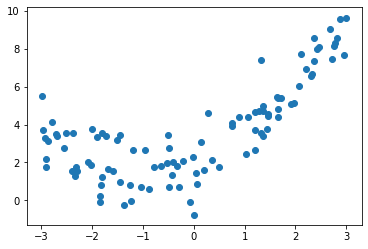

In [4]:
plt.scatter(x, Y)
plt.show()

## 使用线性回归

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.score(X, Y)

0.4953707811865009

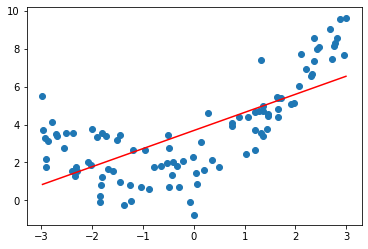

In [6]:
Y_predict = lin_reg.predict(X)
plt.scatter(x, Y)
plt.plot(np.sort(x), Y_predict[np.argsort(x)], color='r')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# 均方误差
Y_predict = lin_reg.predict(X)
mean_squared_error(Y, Y_predict)

3.0750025765636577

## 使用多项式回归

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [9]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, Y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
Y2_predict = poly2_reg.predict(X)
mean_squared_error(Y, Y2_predict)

1.0987392142417858

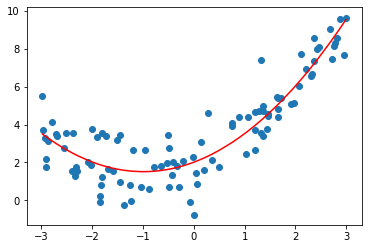

In [11]:
Y_predict = lin_reg.predict(X)
plt.scatter(x, Y)
plt.plot(np.sort(x), Y2_predict[np.argsort(x)], color='r')
plt.show()

In [12]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, Y)
Y10_predict = poly10_reg.predict(X)
mean_squared_error(Y, Y10_predict)

1.0508466763764126

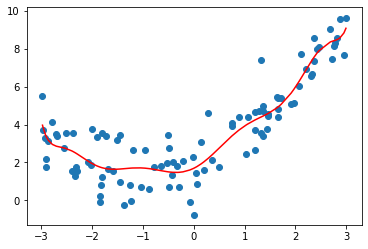

In [13]:
Y_predict = lin_reg.predict(X)
plt.scatter(x, Y)
plt.plot(np.sort(x), Y10_predict[np.argsort(x)], color='r')
plt.show()

In [14]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, Y)
Y100_predict = poly100_reg.predict(X)
mean_squared_error(Y, Y100_predict)

0.6807810661561912

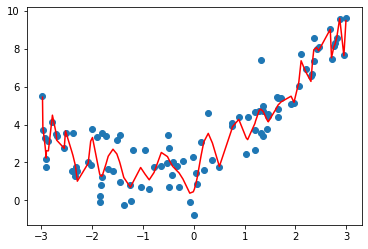

In [15]:
Y_predict = lin_reg.predict(X)
plt.scatter(x, Y)
plt.plot(np.sort(x), Y100_predict[np.argsort(x)], color='r')
plt.show()

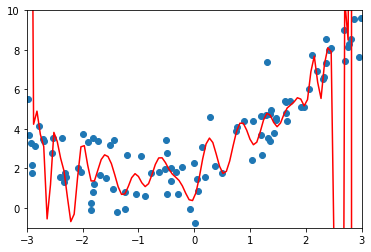

In [17]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
Y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, Y)
plt.plot(X_plot[:, 0], Y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

## train_test_split的意义

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=666)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_predict = lin_reg.predict(X_test)
mean_squared_error(Y_test, Y_predict)

2.2199965269396573

In [24]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, Y_train)
Y2_predict = poly2_reg.predict(X_test)
mean_squared_error(Y_test, Y2_predict)

0.8035641056297902

In [25]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, Y_train)
Y10_predict = poly10_reg.predict(X_test)
mean_squared_error(Y_test, Y10_predict)

0.9212930722150695

In [26]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, Y_train)
Y100_predict = poly100_reg.predict(X_test)
mean_squared_error(Y_test, Y100_predict)

13123135111.531496